In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
class VanDerPolOscillator:
    """
    Van der Pol oscillator implementation,
    """

    def __init__(self, step=0.01, num_iterations=10000, method='euler', init_coordinates=None):
        """
        Construct the object.
        
        Arguments:
            step (float): step size.
            num_iterations (int): number of times to recalculate new location.
            method (str): numerical solving method (`euler` or `runge-kutta`)
            init_coordinates (list[float]): initial location.
        """
        if step <= 0:
            raise Exception('Step parameter should be positive.')

        if num_iterations <= 0:
            raise Exception('num_iterations parameter should be positive.')

        if not isinstance(num_iterations, int):
            raise Exception('num_iterations parameter should be integer.')

        self.step = step
        self.num_iterations = num_iterations

        if method in ['euler', 'runge-kutta']:
            self.method = method

        else:
            raise Exception('Not handled method')

        if init_coordinates is None:
            init_coordinates = [1, 1]
            
        self.init_coordinates = init_coordinates
        self.cached_movement = None

    def set_init_coordinates(self, init_coordinates):
        """
        Provide initial point.

        Arguments:
            init_coordinates (list[float]): initial point location.
        """
        self.init_coordinates = init_coordinates

    def calculate(self, eta):
        """
        Internal function to calculate movement of Lorenz attractor.

        Arguments:
            eta (list[float]): van der Pol parameter.

        Returns:
            movement history as a matrix.
        """
        movement_df = np.empty((self.num_iterations + 1, 2))
        movement_df[0] = self.init_coordinates

        for i in range(self.num_iterations):
            if self.method == 'euler':
                partial_derivatives = self._calc_derivative(coordinates=movement_df[i], eta=eta)
                movement_df[i + 1] = movement_df[i] + partial_derivatives * self.step

            elif self.method == 'runge-kutta':
                k1 = self._calc_derivative(coordinates=movement_df[i], eta=eta)
                k2 = self._calc_derivative(coordinates=movement_df[i] + self.step * k1 / 2, eta=eta)
                k3 = self._calc_derivative(coordinates=movement_df[i] + self.step * k2 / 2, eta=eta)
                k4 = self._calc_derivative(coordinates=movement_df[i] + self.step * k3, eta=eta)

                movement_df[i + 1] = movement_df[i] + self.step * (k1 + 2 * k2 + 2 * k3 + k4) / 6

            else:
                raise Exception('Not handled method')

        self.cached_movement = movement_df

        return movement_df
    
    def _calc_derivative(self, coordinates, eta):
        """
        Calculate derivative for a van der Pol oscillator.
        
        Arguments:
            coordinates (numpy.array): function point.
            eta (float): van der pol parameter

        Returns:
            Partial derivatives as a list.
        """
        x, y = coordinates
        derivative_x = y
        derivative_y = eta * (1 - x*x)*y - x

        partial_derivatives = np.array([derivative_x, derivative_y])

        return partial_derivatives

    def plot(self, movement_df):
        """
        Plot attractor.

        Arguments:
            movement_df (np.array): matrix with function movement.
        """
        ax = plt.figure().add_subplot()

        ax.plot(*movement_df.T, lw=0.6)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_title(f"Van der Pol oscillator phase portrait")

        plt.show()

    def plot_variable(self, variable, num_iterations_to_show=10000):
        """
        Plot variable change depends on iteration number.

        Arguments:
            variable (str): variable name (`x`, `y`)
            num_iterations_to_show (int): number of first iterations to display.
        """
        if num_iterations_to_show is None:
            num_iterations_to_show = len(self.cached_movement)
            
        variable_positions = {
            'x': 0,
            'y': 1,
        }
        position = variable_positions.get(variable)

        fig = plt.figure(dpi=100)
        ax = fig.add_subplot(1,1,1)
        ax.plot(self.cached_movement[: , position], linewidth=0.5)
        ax.set_title(f'{variable} variable movement')
        ax.set_xlabel('iteration')
        ax.set_ylabel(variable)
        fig.show()
        
    def plot_variables(self, num_iterations_to_show=10000):
        """
        Plot variable change depends on iteration number.

        Arguments:
            num_iterations_to_show (int): number of first iterations to display.
        """
        if num_iterations_to_show is None:
            num_iterations_to_show = len(self.cached_movement)
            

        fig = plt.figure(dpi=100)
        
        ax = fig.add_subplot(2,1,1)
        ax.plot(self.cached_movement[: , 0], linewidth=0.5)
        ax.set_title(f'Oscillations')
        ax.set_ylabel('x')
        
        ax = fig.add_subplot(2,1,2)
        ax.plot(self.cached_movement[: , 1], linewidth=0.5)
        ax.set_xlabel('iteration')
        ax.set_ylabel('y')
        
        fig.show()

    def build_oscillator(self, eta):
        """
        Build van der Pol oscillator.

        Arguments:
            eta (list[float]): van der Pol oscillator parameter.
        """
        movement_df = self.calculate(eta=eta)
        self.plot(movement_df=movement_df)

<h2>eta = -0.2</h2>

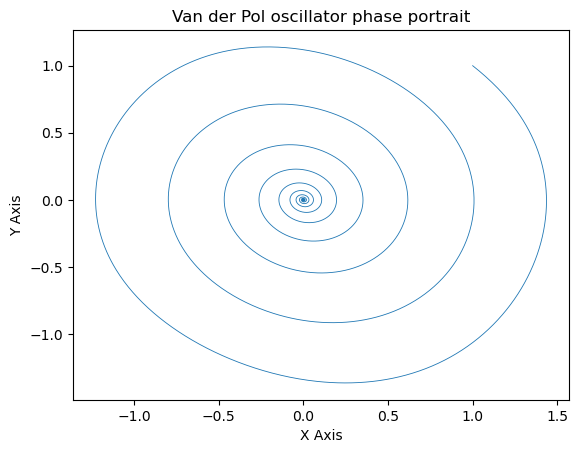

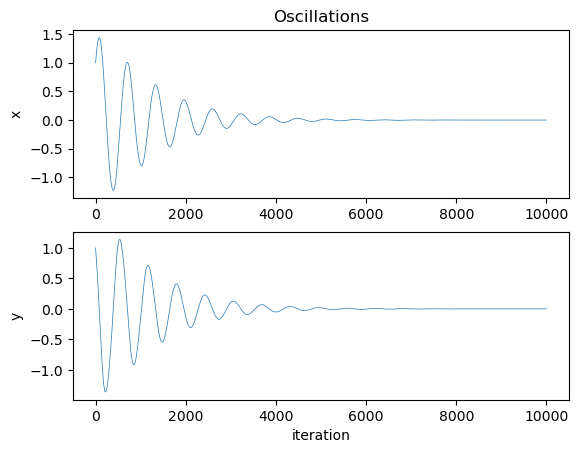

In [3]:
oscillator = VanDerPolOscillator(init_coordinates=[1, 1])
oscillator.build_oscillator(eta=-0.2)
oscillator.plot_variables()

<h2>eta = 0.1</h2>

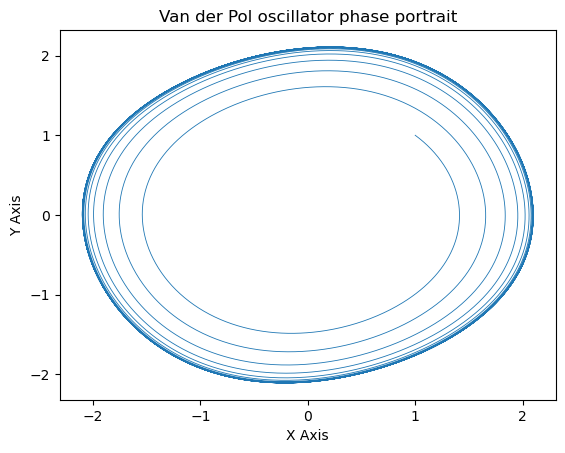

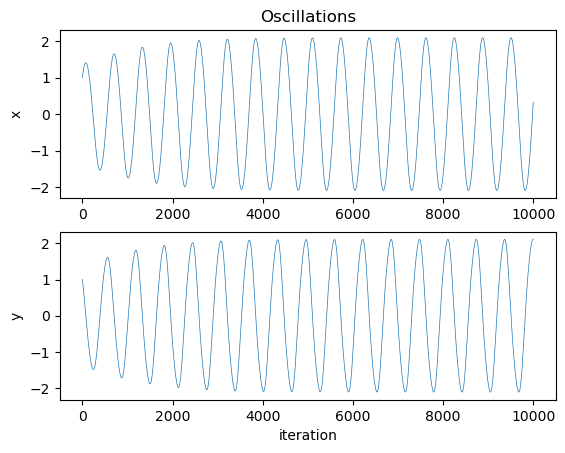

In [4]:
oscillator = VanDerPolOscillator(init_coordinates=[1, 1])
oscillator.build_oscillator(eta=0.1)
oscillator.plot_variables()

<h2>eta = 0.2</h2>

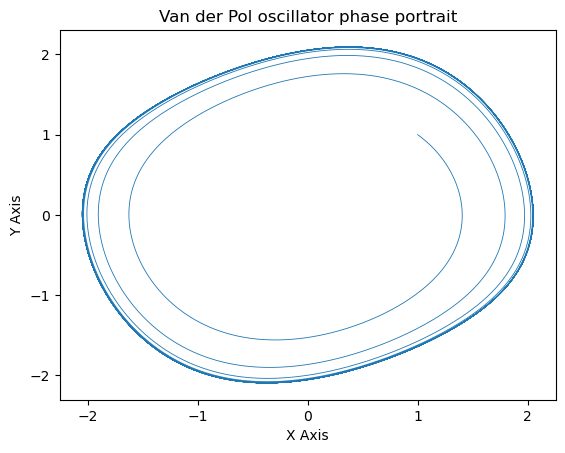

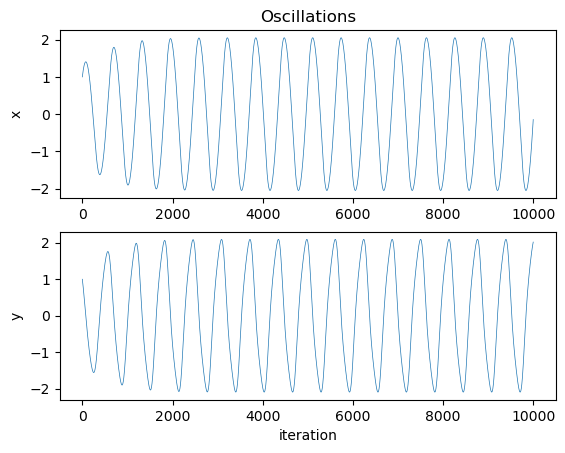

In [5]:
oscillator = VanDerPolOscillator(init_coordinates=[1, 1])
oscillator.build_oscillator(eta=0.2)
oscillator.plot_variables()

<h2>eta = 0.5</h2>

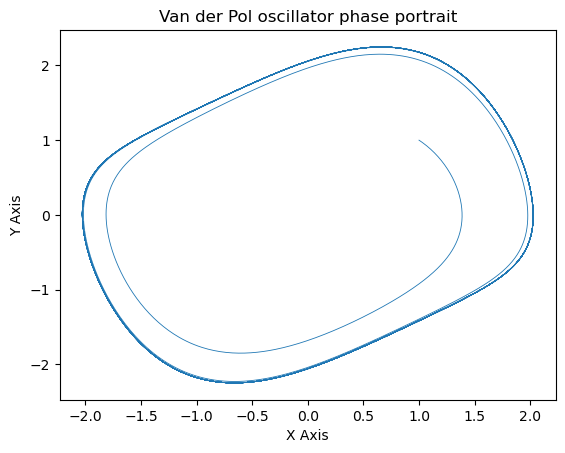

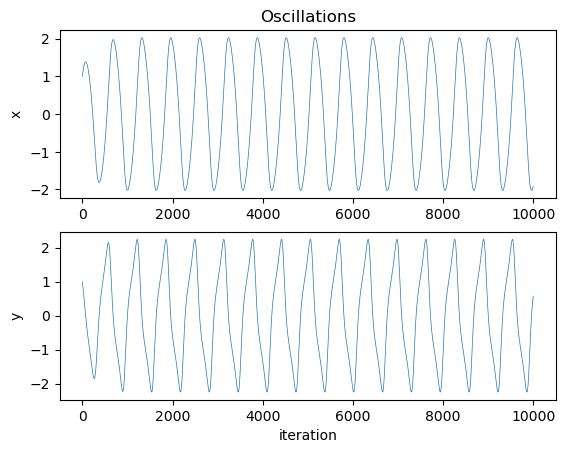

In [6]:
oscillator = VanDerPolOscillator(init_coordinates=[1, 1])
oscillator.build_oscillator(eta=0.5)
oscillator.plot_variables()

<h2>eta = 1</h2>

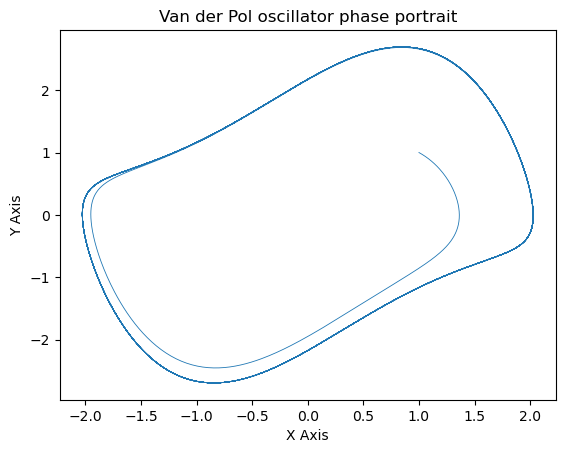

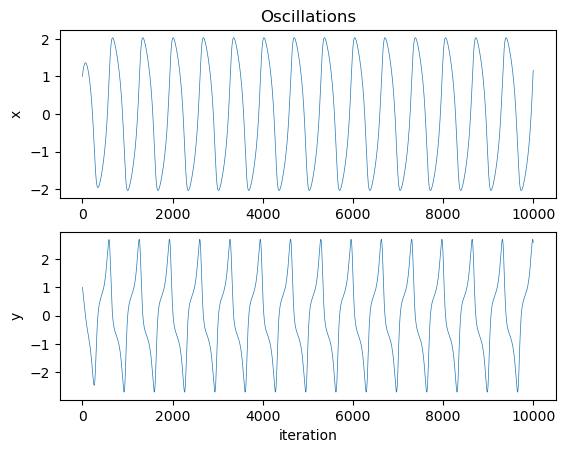

In [7]:
oscillator = VanDerPolOscillator(init_coordinates=[1, 1])
oscillator.build_oscillator(eta=1)
oscillator.plot_variables()

<h2>eta = 2</h2>

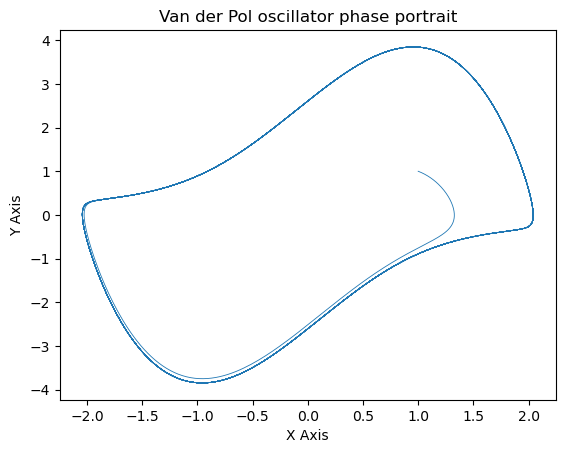

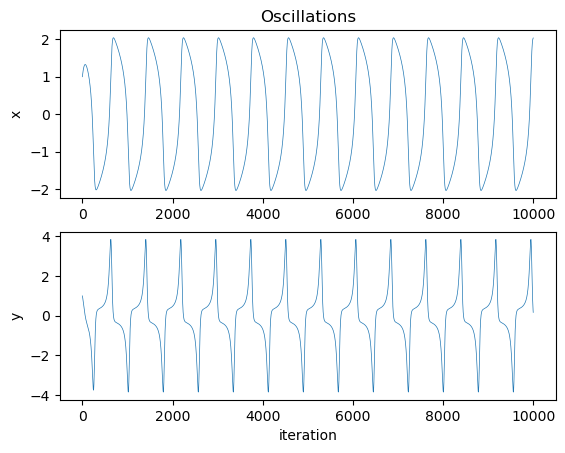

In [8]:
oscillator = VanDerPolOscillator(init_coordinates=[1, 1])
oscillator.build_oscillator(eta=2)
oscillator.plot_variables()